In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import wordcloud

In [2]:
file = '/Users/lijing/PycharmProjects/information_retrieval_twitter/data_collection/tweets_info_after_clean.csv'
df = pd.read_csv(file)
df.columns

Index(['Unnamed: 0', 'id', 'name', 'clean_tweet', 'replies_count',
       'retweets_count', 'likes_count', 'date', 'time'],
      dtype='object')

In [3]:
df[['id','name','clean_tweet','replies_count','retweets_count','likes_count','date','time']]

,id,name,clean_tweet,replies_count,retweets_count,likes_count,date,time
0,1268086264068222976,CNN Breaking News,people including covid patients evacuated low ...,22,61,157,2020-06-03,10:44:59
1,1268069364097523712,CNN Breaking News,british prime minister boris johnson promised ...,157,328,1399,2020-06-03,09:37:50
2,1268061228427104256,CNN Breaking News,ella jones becomes first woman first black may...,152,1051,6735,2020-06-03,09:05:30
3,1268049293681799169,CNN Breaking News,teresa leger fernandez defeat former cia opera...,59,86,363,2020-06-03,08:18:05
4,1268038276285370370,CNN Breaking News,los angeles police arresting protesters outsid...,84,199,613,2020-06-03,07:34:18
...,...,...,...,...,...,...,...,...
81348,903597166249246720,Donald J. Trump,general john kelly great job chief staff could...,9409,11521,66470,2017-09-01,15:35:27
81349,903587428488839170,Donald J. Trump,wow looks like james comey exonerated hillary ...,41855,34818,117081,2017-09-01,14:56:45
81350,903059975437733888,Donald J. Trump,first responders heroic work courage devotion ...,13626,19169,89101,2017-08-31,04:00:50
81351,902978901223366656,Donald J. Trump,texas louisiana w today w tomorrow w every sin...,12395,22768,87175,2017-08-30,22:38:41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81353 entries, 0 to 81352
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      81353 non-null  int64 
 1   id              81353 non-null  int64 
 2   name            81353 non-null  object
 3   clean_tweet     81353 non-null  object
 4   replies_count   81353 non-null  int64 
 5   retweets_count  81353 non-null  int64 
 6   likes_count     81353 non-null  int64 
 7   date            81353 non-null  object
 8   time            81353 non-null  object
dtypes: int64(5), object(4)
memory usage: 5.6+ MB


In [5]:
df.describe()

,Unnamed: 0,id,replies_count,retweets_count,likes_count
count,81353.000000,8.135300e+04,81353.000000,8.135300e+04,8.135300e+04
mean,40676.000000,7.340037e+17,2326.819785,5.543754e+03,1.835320e+04
std,23484.732562,3.950947e+17,7172.920790,1.404680e+04,5.265699e+04
min,0.000000,7.777551e+08,0.000000,0.000000e+00,0.000000e+00
25%,20338.000000,3.989249e+17,76.000000,2.650000e+02,5.790000e+02
50%,40676.000000,8.485354e+17,244.000000,1.186000e+03,2.872000e+03
75%,61014.000000,1.078993e+18,881.000000,5.345000e+03,1.444200e+04
max,81352.000000,1.268132e+18,172658.000000,1.580591e+06,4.362189e+06



# number of tweets per user


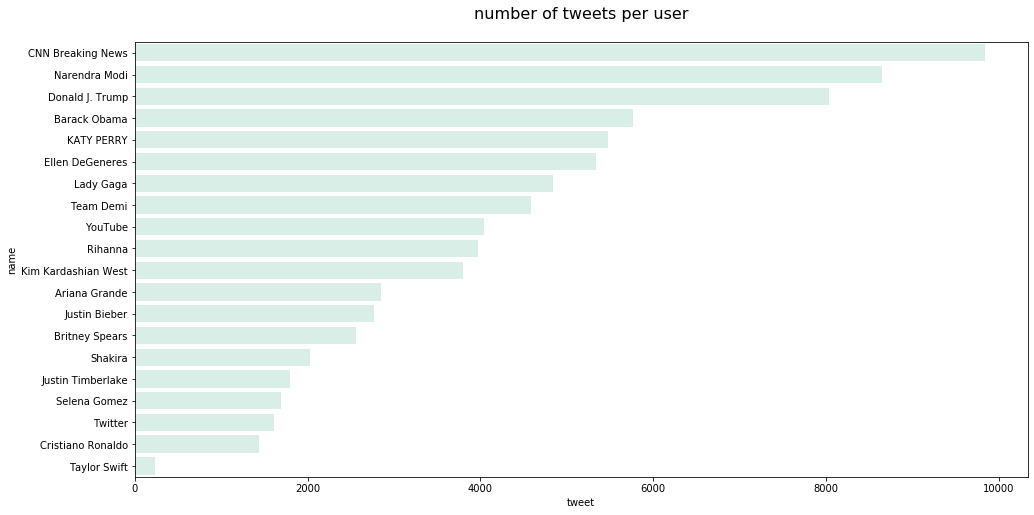

In [6]:

tweets_count = df.groupby('name')['clean_tweet'].count().sort_values(ascending=False).to_frame().reset_index()

f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='clean_tweet', y='name', color='#D4F2E7', data=tweets_count, ax=ax)
ax.set_title('number of tweets per user\n ',fontsize=16)
ax.set_xlabel('tweet')
ax.set_ylabel('name')

plt.show()


# number of replies_count per user


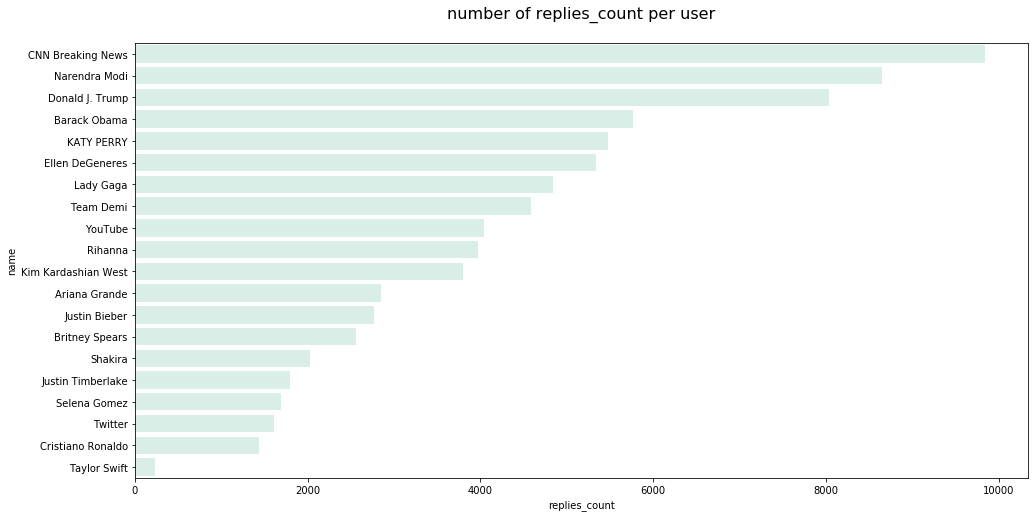

In [7]:
replies_counts = df.groupby('name')['replies_count'].count().sort_values(ascending=False).to_frame().reset_index()

f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='replies_count', y='name', color='#D4F2E7', data=replies_counts, ax=ax) #palette="Blues_d"
ax.set_title('number of replies_count per user\n ' ,fontsize=16)
ax.set_xlabel('replies_count')
ax.set_ylabel('name')

plt.show()


# number of retweets_count per user


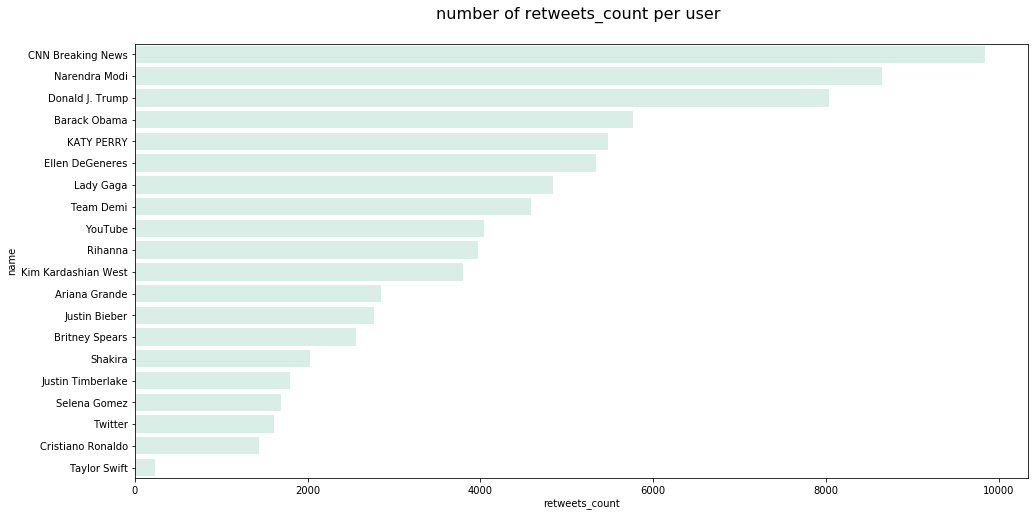

In [8]:
retweets_counts = df.groupby('name')['retweets_count'].count().sort_values(ascending=False).to_frame().reset_index()

f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='retweets_count', y='name', color='#D4F2E7', data=retweets_counts, ax=ax)
ax.set_title('number of retweets_count per user \n ' ,fontsize=16)
ax.set_xlabel('retweets_count')
ax.set_ylabel('name')

plt.show()


# number of likes_count per user


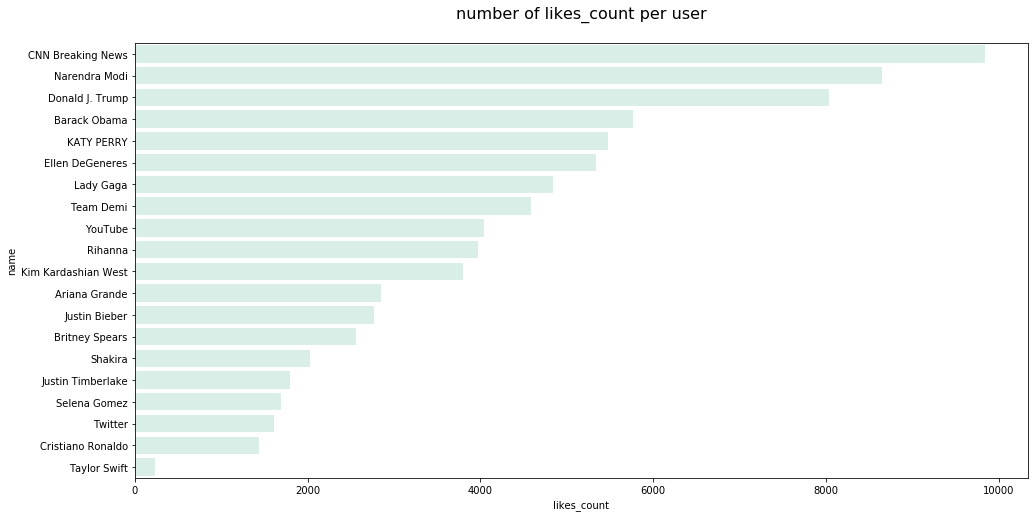

In [9]:
likes_counts = df.groupby('name')['likes_count'].count().sort_values(ascending=False).to_frame().reset_index()

f, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='likes_count', y='name', color='#D4F2E7', data=likes_counts, ax=ax)
ax.set_title('number of likes_count per user\n',fontsize=16)
ax.set_xlabel('likes_count')
ax.set_ylabel('name')

plt.show()


# Years of each user's tweets


In [10]:
df['date']    

0        2020-06-03
1        2020-06-03
2        2020-06-03
3        2020-06-03
4        2020-06-03
            ...    
81348    2017-09-01
81349    2017-09-01
81350    2017-08-31
81351    2017-08-30
81352    2017-08-30
Name: date, Length: 81353, dtype: object

In [11]:
df['date'] = df['date'] .str.replace('-', '/')

In [12]:
df['date']

0        2020/06/03
1        2020/06/03
2        2020/06/03
3        2020/06/03
4        2020/06/03
            ...    
81348    2017/09/01
81349    2017/09/01
81350    2017/08/31
81351    2017/08/30
81352    2017/08/30
Name: date, Length: 81353, dtype: object

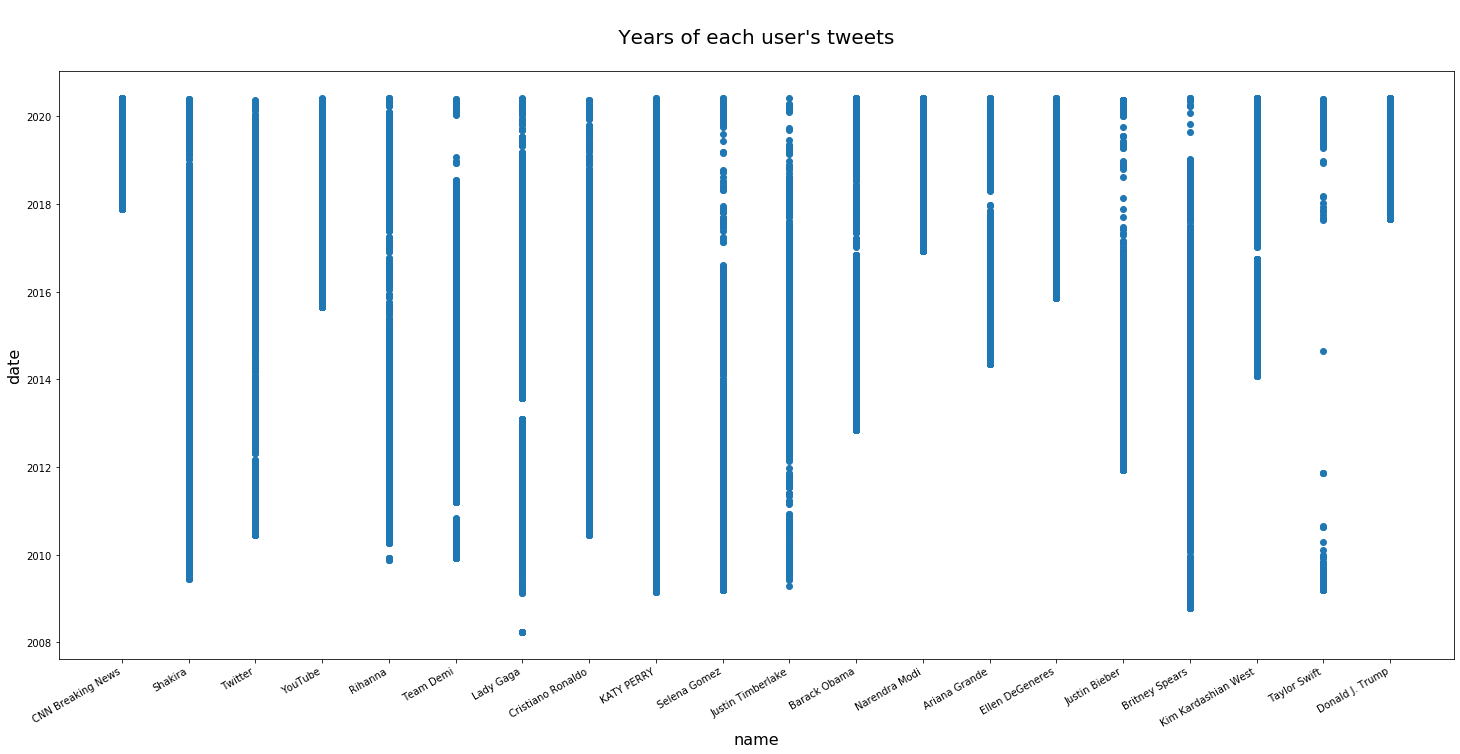

In [13]:
ys = [datetime.strptime(d, '%Y/%m/%d').date() for d in df['date']]
xs = df['name']

plt.subplots(figsize=(25, 12))
plt.title("\n Years of each user's tweets \n" ,fontsize=20)
plt.plot(xs, ys,'o')
plt.xlabel('name',fontsize=16)
plt.ylabel('date',fontsize=16)

# plt.text(xs[-1], ys[-1], ys[-1], ha='right', va='bottom', fontsize=10)

plt.gcf().autofmt_xdate()  # Automatically rotate date marks (自动旋转日期标记)
plt.show()


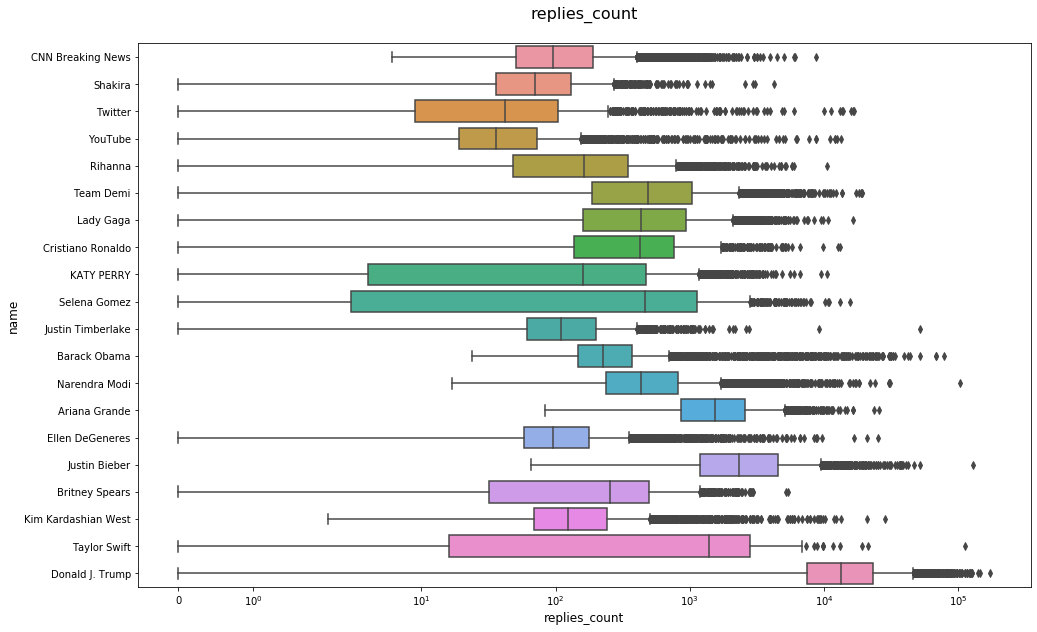

In [14]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xscale("symlog")
sns.boxplot(x="replies_count", y="name", data=df)
plt.title("replies_count\n", fontsize=16)
plt.xlabel('replies_count', fontsize=12)
plt.ylabel('name', fontsize=12)
plt.show()

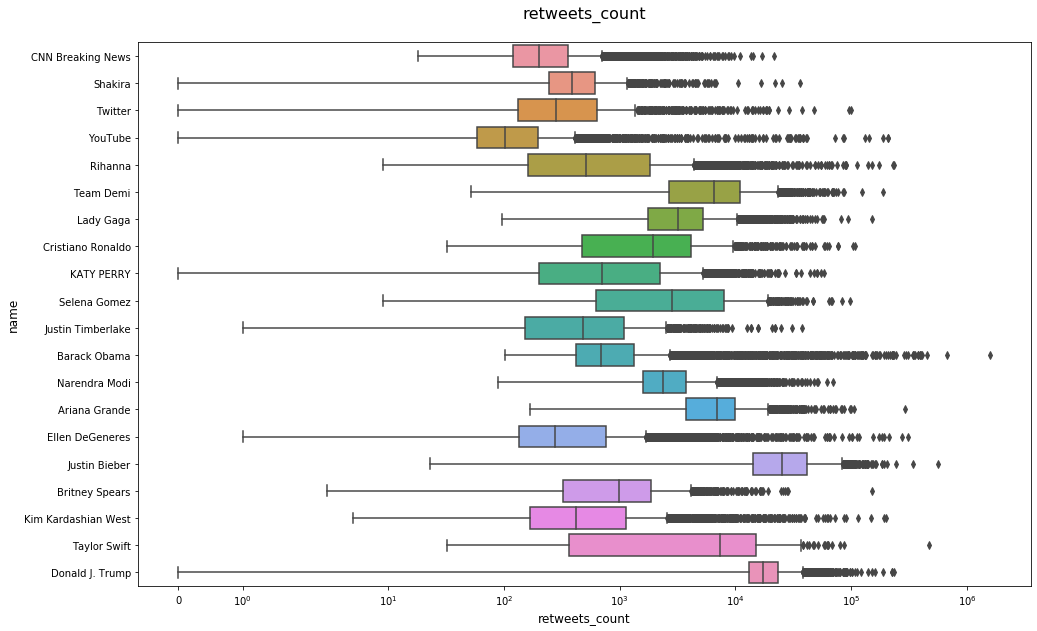

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xscale("symlog")
sns.boxplot(x="retweets_count", y="name", data=df)
plt.title("retweets_count\n", fontsize=16)
plt.xlabel('retweets_count', fontsize=12)
plt.ylabel('name', fontsize=12)
plt.show()

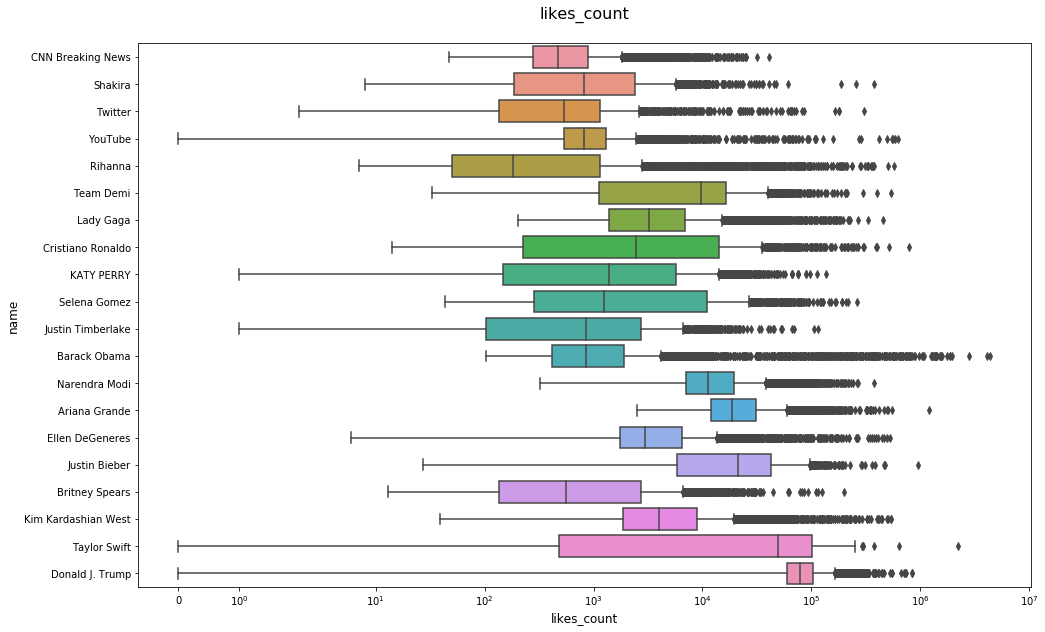

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xscale("symlog")
sns.boxplot(x="likes_count", y="name", data=df)
plt.title("likes_count\n", fontsize=16)
plt.xlabel('likes_count', fontsize=12)
plt.ylabel('name', fontsize=12)
plt.show()


# Word frequency


In [17]:
df['clean_tweet']

0        people including covid patients evacuated low ...
1        british prime minister boris johnson promised ...
2        ella jones becomes first woman first black may...
3        teresa leger fernandez defeat former cia opera...
4        los angeles police arresting protesters outsid...
                               ...                        
81348    general john kelly great job chief staff could...
81349    wow looks like james comey exonerated hillary ...
81350    first responders heroic work courage devotion ...
81351    texas louisiana w today w tomorrow w every sin...
81352    leaving missouri soon speech tax cuts tax refo...
Name: clean_tweet, Length: 81353, dtype: object

In [18]:
len = len(df['clean_tweet'])

In [19]:
words = []
for tweet in df['clean_tweet']:
    for t in tweet.split():
        words.append(t)


In [20]:
# print(words)

In [21]:
word_counts = Counter(words)
print(word_counts)

Counter({'u': 6234, 'love': 6191, 'new': 5933, 'people': 5517, 'president': 5483, 'today': 4544, 'thank': 4441, 'get': 4158, 'rt': 3966, 'one': 3886, 'great': 3861, 'us': 3802, 'time': 3620, 'see': 3584, 'like': 3356, 'day': 3274, 'india': 2915, 'happy': 2893, 'show': 2886, 'much': 2858, 'tonight': 2759, 'watch': 2755, 'obama': 2729, 'live': 2642, 'make': 2625, 'trump': 2507, 'good': 2455, 'world': 2448, 'says': 2412, 'last': 2329, 'first': 2313, 'best': 2300, 'know': 2254, 'go': 2189, 'back': 2133, 'year': 2113, 'video': 2027, 'night': 2013, 'say': 2007, 'got': 2002, 'would': 1995, 'thanks': 1990, 'want': 1887, 'years': 1843, 'life': 1803, 'many': 1792, 'birthday': 1739, 'never': 1717, 'also': 1673, 'big': 1667, 'work': 1654, 'rihanna': 1651, 'way': 1646, 'made': 1642, 'two': 1629, 'tomorrow': 1611, 'let': 1597, 'country': 1592, 'everyone': 1580, 'help': 1572, 'guys': 1559, 'going': 1556, 'ever': 1545, 'right': 1544, 'amazing': 1544, 'state': 1530, 'look': 1514, 'every': 1513, 'house'

In [22]:
type(word_counts)

collections.Counter

In [23]:
top_100 = word_counts.most_common(100)

In [24]:
top_100

[('u', 6234),
 ('love', 6191),
 ('new', 5933),
 ('people', 5517),
 ('president', 5483),
 ('today', 4544),
 ('thank', 4441),
 ('get', 4158),
 ('rt', 3966),
 ('one', 3886),
 ('great', 3861),
 ('us', 3802),
 ('time', 3620),
 ('see', 3584),
 ('like', 3356),
 ('day', 3274),
 ('india', 2915),
 ('happy', 2893),
 ('show', 2886),
 ('much', 2858),
 ('tonight', 2759),
 ('watch', 2755),
 ('obama', 2729),
 ('live', 2642),
 ('make', 2625),
 ('trump', 2507),
 ('good', 2455),
 ('world', 2448),
 ('says', 2412),
 ('last', 2329),
 ('first', 2313),
 ('best', 2300),
 ('know', 2254),
 ('go', 2189),
 ('back', 2133),
 ('year', 2113),
 ('video', 2027),
 ('night', 2013),
 ('say', 2007),
 ('got', 2002),
 ('would', 1995),
 ('thanks', 1990),
 ('want', 1887),
 ('years', 1843),
 ('life', 1803),
 ('many', 1792),
 ('birthday', 1739),
 ('never', 1717),
 ('also', 1673),
 ('big', 1667),
 ('work', 1654),
 ('rihanna', 1651),
 ('way', 1646),
 ('made', 1642),
 ('two', 1629),
 ('tomorrow', 1611),
 ('let', 1597),
 ('country', 

In [25]:
top_100_list = [[]]

i = 0
while i < 100:
    top_100_list.append([top_100[i][0],top_100[i][1]])
    i+=1
del[top_100_list[0]]
print(top_100_list)

[['u', 6234], ['love', 6191], ['new', 5933], ['people', 5517], ['president', 5483], ['today', 4544], ['thank', 4441], ['get', 4158], ['rt', 3966], ['one', 3886], ['great', 3861], ['us', 3802], ['time', 3620], ['see', 3584], ['like', 3356], ['day', 3274], ['india', 2915], ['happy', 2893], ['show', 2886], ['much', 2858], ['tonight', 2759], ['watch', 2755], ['obama', 2729], ['live', 2642], ['make', 2625], ['trump', 2507], ['good', 2455], ['world', 2448], ['says', 2412], ['last', 2329], ['first', 2313], ['best', 2300], ['know', 2254], ['go', 2189], ['back', 2133], ['year', 2113], ['video', 2027], ['night', 2013], ['say', 2007], ['got', 2002], ['would', 1995], ['thanks', 1990], ['want', 1887], ['years', 1843], ['life', 1803], ['many', 1792], ['birthday', 1739], ['never', 1717], ['also', 1673], ['big', 1667], ['work', 1654], ['rihanna', 1651], ['way', 1646], ['made', 1642], ['two', 1629], ['tomorrow', 1611], ['let', 1597], ['country', 1592], ['everyone', 1580], ['help', 1572], ['guys', 1559]

In [26]:
top_100_dict = dict(top_100_list)
type(top_100_dict)

dict

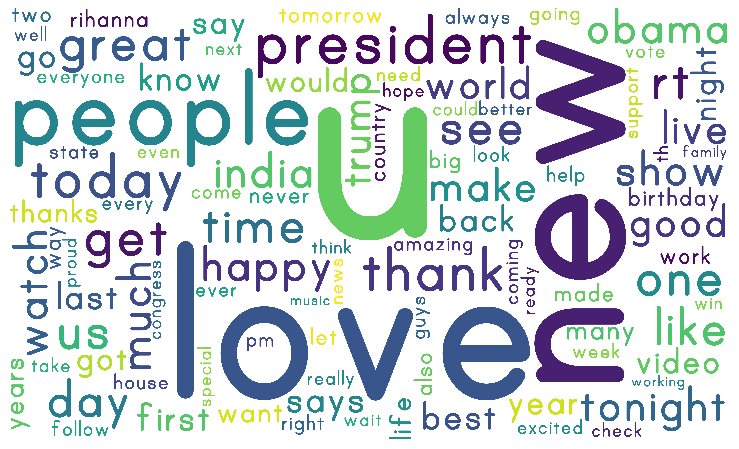

In [29]:
plt.figure(num='words',figsize=(16,8))
w = wordcloud.WordCloud(width=5000,height=3000,background_color='white',margin=10,font_path='/Users/lijing/Documents/font_style/PrintBold-webfont.ttf')
w.generate_from_frequencies(top_100_dict)

plt.imshow(w)  # 显示词云
plt.axis('off')  # 关闭坐标轴
plt.show()  # 显示图像
w.to_file('words.png')  # 保存图片